In [3]:
# boilerplate cell for stuff that comes out of the box with R, probably
# copied from https://github.com/Azure/RNNForTimeSeriesForecasting, because I am new to this stuff
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_process import arma_generate_sample as arimasim
from statsmodels.tsa.ar_model import AR, ARResults
from glob import glob
from collections import UserDict
from IPython.display import Image, Markdown, display
from utils import Capturing, pcorr
%matplotlib inline

# some kind soul ported a bunch of default R datasets (and more) into python, bless his soul
from pydataset import data as pdsd

pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(precision=4)

We export the `bodyfat` data as csv from `library(isdals)` in R.

In [6]:
bodyfat = pd.read_csv("bodyfat.csv").drop(["index"],axis=1)
bodyfat

,Fat,Triceps,Thigh,Midarm
0,11.9000,19.5000,43.1000,29.1000
1,22.8000,24.7000,49.8000,28.2000
2,18.7000,30.7000,51.9000,37.0000
3,20.1000,29.8000,54.3000,31.1000
4,12.9000,19.1000,42.2000,30.9000
5,21.7000,25.6000,53.9000,23.7000
6,27.1000,31.4000,58.5000,27.6000
7,25.4000,27.9000,52.1000,30.6000
8,21.3000,22.1000,49.9000,23.2000
9,19.3000,25.5000,53.5000,24.8000


Original:
```R
pairs(cbind(Fat, Triceps, Thigh, Midarm))
```

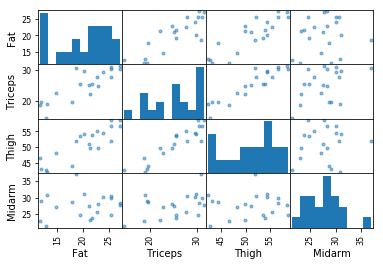

In [7]:
pd.tools.plotting.scatter_matrix(bodyfat)
plt.show()

Original:
```R
cor(cbind(Fat, Triceps, Thigh, Midarm))
```

In [8]:
bodyfat.corr()

,Fat,Triceps,Thigh,Midarm
Fat,1.0000,0.8433,0.8781,0.1424
Triceps,0.8433,1.0000,0.9238,0.4578
Thigh,0.8781,0.9238,1.0000,0.0847
Midarm,0.1424,0.4578,0.0847,1.0000


Original:
```R
library(ppcor)
pcor(cbind(Fat, Triceps, Thigh))
```
Result:
```
$estimate
              Fat   Triceps     Thigh
Fat     1.0000000 0.1749822 0.4814109
Triceps 0.1749822 1.0000000 0.7130120
Thigh   0.4814109 0.7130120 1.0000000

$p.value
               Fat      Triceps        Thigh
Fat     0.00000000 0.4736789763 0.0368987227
Triceps 0.47367898 0.0000000000 0.0006109801
Thigh   0.03689872 0.0006109801 0.0000000000

$statistic
              Fat   Triceps    Thigh
Fat     0.0000000 0.7327755 2.264597
Triceps 0.7327755 0.0000000 4.192849
Thigh   2.2645969 4.1928494 0.000000

$n
[1] 20

$gp
[1] 1

$method
[1] "pearson"
```

In [23]:
# pcorr function and manipulation of bodyfat data to get similar results as R from https://gist.github.com/fabianp/9396204419c7b638d38f
bfarr = bodyfat.drop(["Midarm"],axis=1).as_matrix()
bfarr_int = np.hstack((np.ones((bfarr.shape[0],1)),bfarr))
pcorr(bfarr_int)[1:,1:]

array([[1.    , 0.175 , 0.4814],
       [0.175 , 1.    , 0.713 ],
       [0.4814, 0.713 , 1.    ]])

Original:
```R
pcor(cbind(Fat, Triceps, Thigh, Midarm))
```

In [24]:
bfarr = bodyfat.as_matrix()
bfarr_int = np.hstack((np.ones((bfarr.shape[0],1)),bfarr))
pcorr(bfarr_int)[1:,1:]

array([[ 1.    ,  0.3381, -0.2666, -0.3241],
       [ 0.3381,  1.    ,  0.9964,  0.9956],
       [-0.2666,  0.9964,  1.    , -0.9927],
       [-0.3241,  0.9956, -0.9927,  1.    ]])